
=== Evaluating FD001 ===
Local : {'MSE': 304.0960217428921, 'RMSE': 17.438349169083985, 'MAE': 13.289184725, 'Bias': -7.877905285000001, 'NASA_score': 342.56825227581487}
Global: {'MSE': 220.1069543874623, 'RMSE': 14.83600196776282, 'MAE': 10.909810644000002, 'Bias': 0.8385919959999996, 'NASA_score': 447.357446326007}


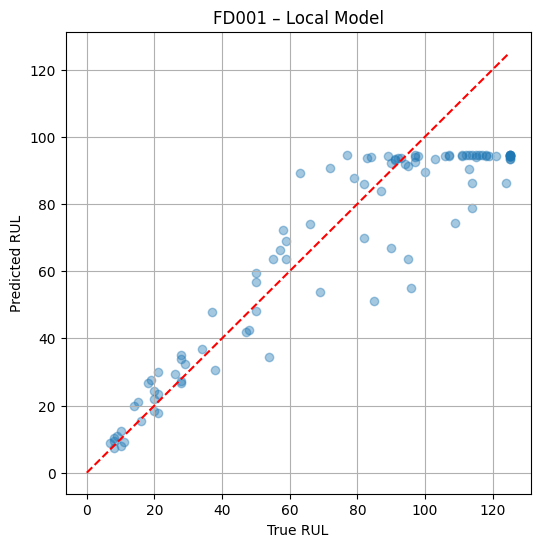

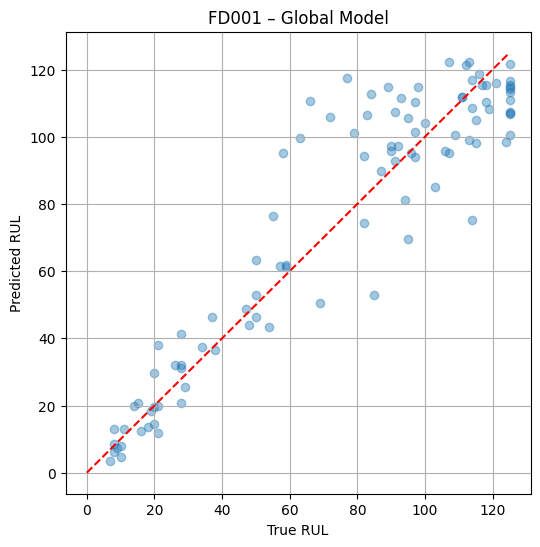


=== Evaluating FD002 ===
Local : {'MSE': 371.02503744557924, 'RMSE': 19.262010212996444, 'MAE': 15.032057455984555, 'Bias': -5.547569297683399, 'NASA_score': 1713.7330070215728}
Global: {'MSE': 300.2091882558813, 'RMSE': 17.326545768152442, 'MAE': 12.706456533976834, 'Bias': -4.154045885328186, 'NASA_score': 1395.6317292294311}


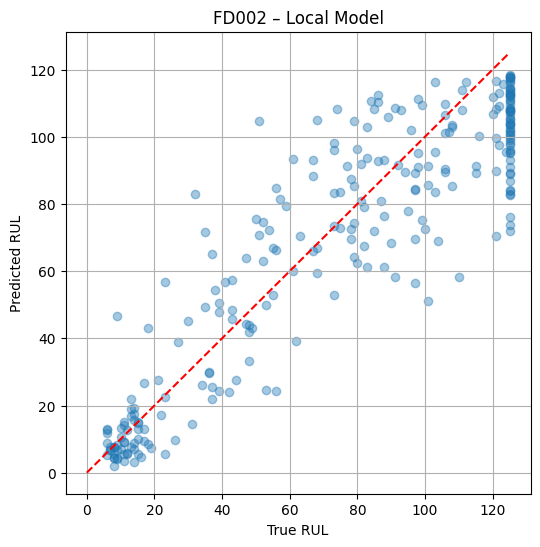

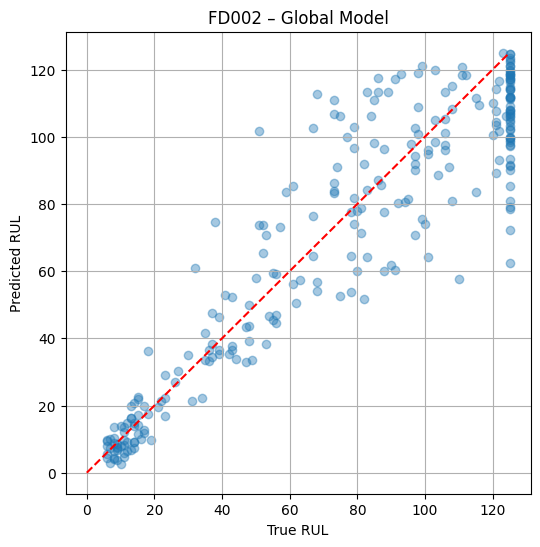


=== Evaluating FD003 ===
Local : {'MSE': 205.97139687010775, 'RMSE': 14.351703622570659, 'MAE': 10.540734183, 'Bias': -2.575180723, 'NASA_score': 278.03024683915623}
Global: {'MSE': 231.42949000821653, 'RMSE': 15.212806776141493, 'MAE': 11.278234714, 'Bias': 0.7416773000000002, 'NASA_score': 428.5006970679436}


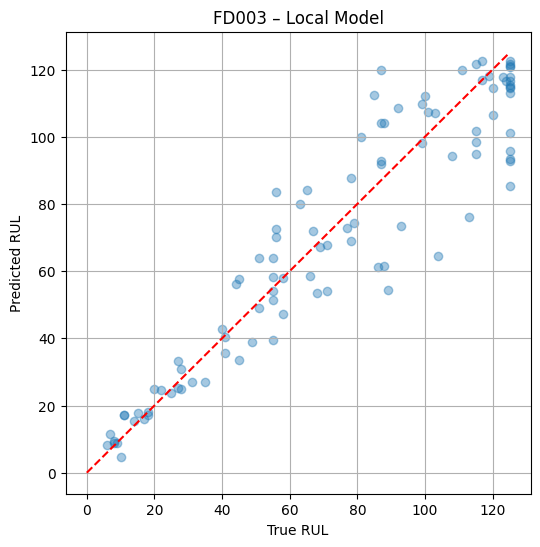

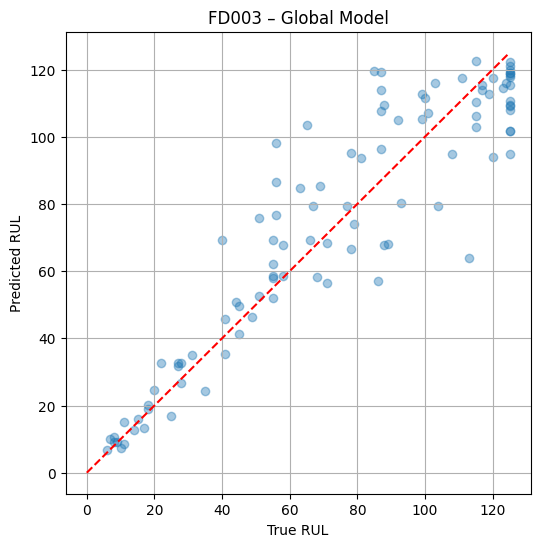


=== Evaluating FD004 ===
Local : {'MSE': 528.528128837378, 'RMSE': 22.989739642661853, 'MAE': 16.942756409274192, 'Bias': -9.396808401209677, 'NASA_score': 2631.6817076519146}
Global: {'MSE': 326.85558612182297, 'RMSE': 18.079147826206384, 'MAE': 13.185149791935483, 'Bias': -1.93438890483871, 'NASA_score': 1622.1023388381304}


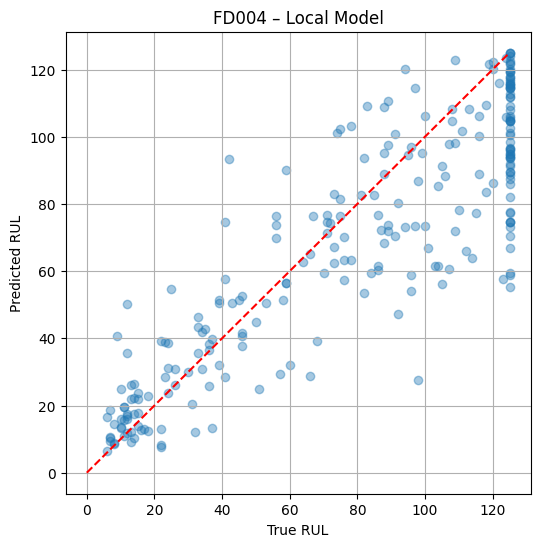

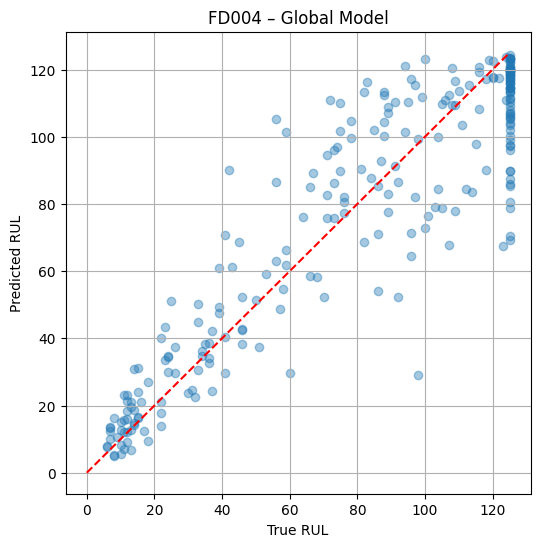

,FD,Local RMSE,Global RMSE,Local NASA,Global NASA
0,FD001,17.438349,14.836002,342.568252,447.357446
1,FD002,19.262010,17.326546,1713.733007,1395.631729
2,FD003,14.351704,15.212807,278.030247,428.500697
3,FD004,22.989740,18.079148,2631.681708,1622.102339


In [4]:
# -----------------------------------------------------
# 3_global_model_evaluation.ipynb
# Compare Local vs Global Model Predictions
# -----------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import sys
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)
# print("Project root in sys.path:", root_dir)
from src.training import compute_basic_metrics
from src.config import MAX_RUL

# -----------------------------------------
# Helper: Plot RUL Scatter
# -----------------------------------------
def plot_scatter(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.4)
    plt.plot([0, MAX_RUL], [0, MAX_RUL], "r--")
    plt.xlabel("True RUL")
    plt.ylabel("Predicted RUL")
    plt.title(title)
    plt.grid(True)
    plt.show()

# -----------------------------------------
# Load predictions
# -----------------------------------------
def load_fd_results(fd_id, root="../results"):
    local_path = os.path.join(root, fd_id, f"{fd_id}_predictions_local.csv")
    global_path = os.path.join(root, "global", f"{fd_id}_global_predictions.csv")

    df_local = pd.read_csv(local_path)
    df_global = pd.read_csv(global_path)

    return df_local, df_global

# -----------------------------------------
# Evaluate and plot all FDs
# -----------------------------------------
fds = ["FD001", "FD002", "FD003", "FD004"]
metrics_table = []

for fd in fds:
    print(f"\n=== Evaluating {fd} ===")

    df_local, df_global = load_fd_results(fd)

    y_true = df_local["TrueRUL"].values
    y_pred_local = df_local["PredRUL"].values
    y_pred_global = df_global["PredRUL"].values

    # Metrics
    m_local  = compute_basic_metrics(y_true, y_pred_local)
    m_global = compute_basic_metrics(y_true, y_pred_global)

    metrics_table.append({
        "FD": fd,
        "Local RMSE": m_local["RMSE"],
        "Global RMSE": m_global["RMSE"],
        "Local NASA": m_local["NASA_score"],
        "Global NASA": m_global["NASA_score"]
    })

    print("Local :", m_local)
    print("Global:", m_global)

    # Plots
    plot_scatter(y_true, y_pred_local, f"{fd} – Local Model")
    plot_scatter(y_true, y_pred_global, f"{fd} – Global Model")

# Summary table
pd.DataFrame(metrics_table)
